## Домашнее задание 4: Contingency Table

### О задании

1) In your data set, select a subset with 3 to 6 features related, more or less, to the same aspect and explain your choice.

2) Visualize the data subset using standardization with two versions of normalization: (a) over ranges and (b) over standard deviations. At these visualizations, use a distinct shape/colour for points representing a pre-specified by you group of objects.

3) Apply the conventional PCA for visualization and see if there is any difference with respect to (a)/(b) above. Comment on which of the normalizations is better, in your opinion, and why.

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

In [46]:
df = pd.read_csv('../../data/Accidents0515-04.csv')
MAX_ROWS = 10 ** 5
if df.shape[0] > MAX_ROWS: # так как датасет очень большой, удалим лишние строки, чтобы облегчить вычисления
    df.drop(df.tail(df.shape[0] - MAX_ROWS).index,inplace=True) 
df.head()

,Road_Type,Light_Conditions,Urban_or_Rural_Area
0,6,1,1
1,3,4,1
2,6,4,1
3,6,1,1
4,6,7,1


In [47]:
df.columns

Index(['Road_Type', 'Light_Conditions', 'Urban_or_Rural_Area'], dtype='object')

Выберем три признака, которые более-менее имеют отношение к одному и тому же аспекту:
"Urban_or_Rural_Area", "Light_Conditions", "Road_Type"
Все эти признаки - внешние факторы, которые влияют на управляемость автомобилем.

In [48]:
pd.read_csv('../../data/Road_Type.csv')

,code,label
0,1,Roundabout
1,2,One way street
2,3,Dual carriageway
3,6,Single carriageway
4,7,Slip road
5,9,Unknown
6,12,One way street/Slip road
7,-1,Data missing or out of range


In [49]:
pd.read_csv('../../data/Light_Conditions.csv')

,code,label
0,1,Daylight
1,4,Darkness - lights lit
2,5,Darkness - lights unlit
3,6,Darkness - no lighting
4,7,Darkness - lighting unknown
5,-1,Data missing or out of range


In [50]:
pd.read_csv('../../data/Urban_Rural.csv')

,code,label
0,1,Urban
1,2,Rural
2,3,Unallocated


Нормализуем данные по диапазону от 1 до 3 и визуализиурем их распределение

In [51]:
from sklearn.preprocessing import MinMaxScaler

In [83]:
scaler = MinMaxScaler(feature_range=(1, 3))
range_norm = scaler.fit_transform(df.copy())

In [84]:
def plot_distribution(arr):
    x = [[], [], []]
    y = [[], [], []]
    names = ["Road_Type", "Light_Conditions", "Urban_or_Rural_Area"]

    a = [[], [], []]

    for j in range(3):
        for i in arr:
            x[j].append(i[j])
        x[j] = list(set(x[j]))
        x[j] = sorted(x[j])

    for k in range(3):
        for i in x[k]:
            cnt = 0
            for j in arr:
                if j[k] == i:
                    cnt += 1
            y[k].append(cnt)

    for k in range(3):
        a = plt.subplot(3, 1, k + 1)
        f = a.figure
        f.set_figheight(10)
        f.set_figwidth(10)
        if k == 0:
            plt.title("Features distribution")
        plt.plot(x[k], y[k], ".-")
        plt.ylabel("Frequency of {}".format(names[k]))
        if k == 2:
            plt.xlabel("Value")

    plt.show()

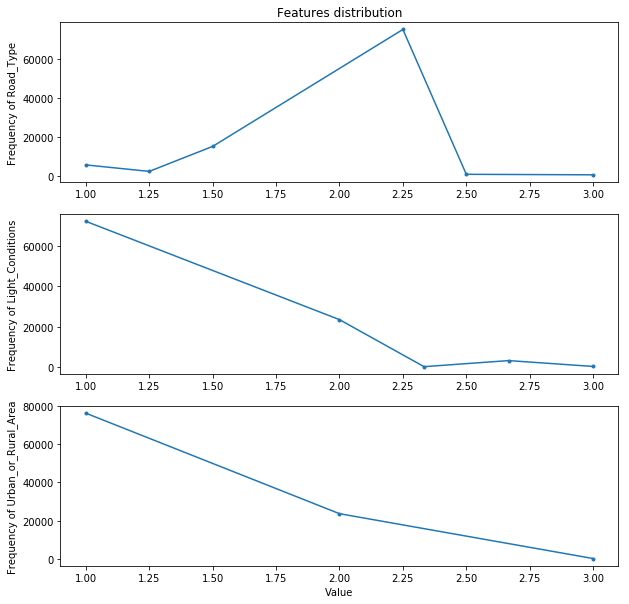

In [85]:
plot_distribution(range_norm)

Нормализуем данные по стандартному распределению

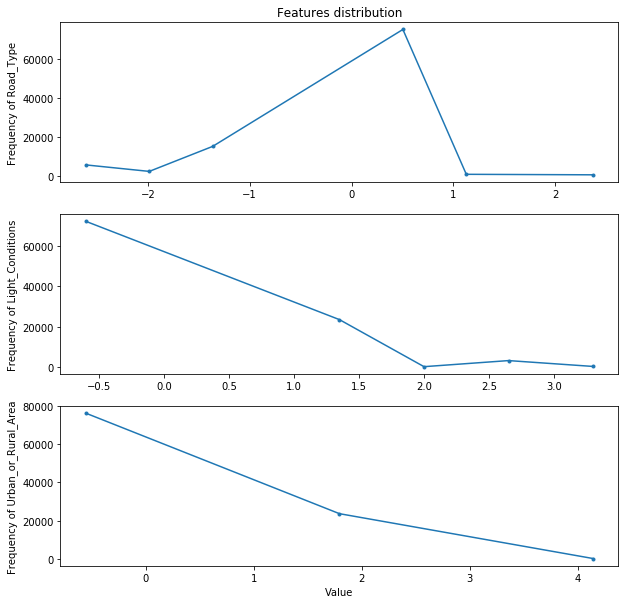

In [86]:
df_norm = df.copy()
for c in df_norm.columns:
    col = df_norm[c]
    df_norm[c] = (col - col.mean()) / col.std()
plot_distribution(np.array(df_norm))

На общий взгляд у каждого признака у графика, что в пункте (а), что в пункте (б) одинковое распределение, различие лишь только в сдвиге на среднее. Ни для кого не секрет, что распределение Гаусса по построению сдвигает значения на среднее. Делая выводы о признаках в совокупности, удобнее смотреть на графики из пункта (а), потому что значения не смещены независимо по каждому признаку и рассматривая, какое-то значение, например, признака Urban/Rural, можно мысленно нормализовать остальные графики относительно количества аварий в городе или в сельской местности, то есть рассмотреть их независимо. Но у нормализации по масштабу есть минусы, например, если в датасете есть выбросы, то интервал, например, может получиться слишком большим, тогда графики не будут такими репрезентативными. Как известно, почти во всех датасетах есть выбросы, тем более, когда речь идет об авариях, не все аварии случаются по примерно одинаковой причине. Например, водитель может быть пьяным, а такой признак отсутствует, хотя по остальным признакам казалось бы ничего не предвещает беды. На помощь в такой ситуации приходит стандартизация(нормализация по Гауссу), которая презентуе все относительно среднего значения.
По графикам видно, что они более-менее(особенно сильно это заметно между графиками признаков "условия освещения" и "сельская или городская местность") схожи по своей форме, это обусловлено тем, что изначально мы выбрали признаки, которые более-менее влияют на один и тот же аспект.